In [1]:
import torch 
from gsnn.reinforce.VAE import VAE 
from gsnn.proc.utils import get_function_pathway_features
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA

In [2]:
data = torch.load('../../gsnn-lib/processed_data/data.pt')

uni2rea = pd.read_csv(f'../../data/UniProt2Reactome_All_Levels.txt', sep='\t', header=None).rename({i:n for i,n in enumerate(['uniprot', 'pathway_id', 'url', 'name', '-', 'species'])}, axis=1)
x, pathway_ids, pathway_names = get_function_pathway_features(data, uni2rea, K=1000)

In [3]:
x.shape

torch.Size([8934, 1000])

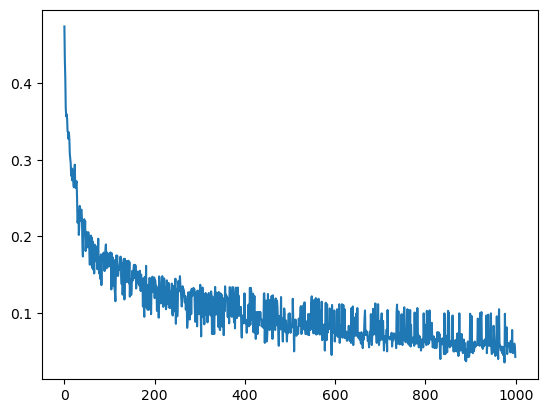

In [4]:
plt.plot(x.std(0))

In [5]:
model = VAE(x, dropout=0., hidden_channels=512, latent_dim=124)
aupr, auroc = model.train(device='cuda', epochs=1000, patience=250, lr=1e-3, beta=1)

Epoch 999: loss: 20.7635 | bce: 8.801 || kl: 10.2409
test aupr: 0.8743537021847103
test auroc: 0.9960222897928922


(array([  2.,   2.,  10.,  12.,  27.,  37.,  58.,  96., 165., 591.]),
 array([0.06298224, 0.15668401, 0.25038579, 0.34408757, 0.43778934,
        0.53149112, 0.6251929 , 0.71889467, 0.81259645, 0.90629822,
        1.        ]),
 <BarContainer object of 10 artists>)

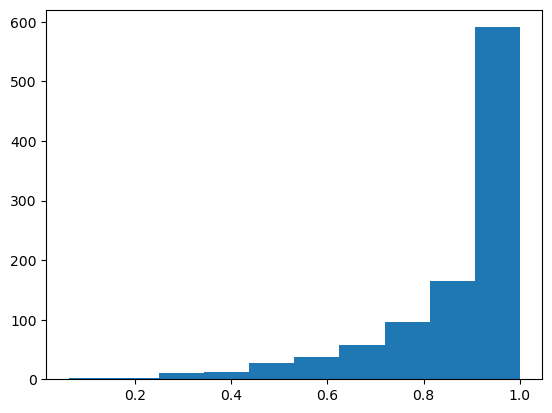

In [14]:
plt.hist(aupr)

In [15]:
z  = model.embed(device='cpu')

In [16]:
z.shape

(8934, 124)

In [17]:
z.mean(0)

array([-2.5436410e-03, -3.6150732e-04,  2.8705096e-03, -4.1503087e-03,
       -2.4983294e-03,  7.1997393e-04,  4.8895563e-06,  9.3877217e-04,
       -1.1793280e-03, -7.8508898e-04,  1.6115482e-03, -3.0117569e-04,
        1.6461336e-05, -7.9577528e-03,  5.3590094e-04,  1.4643549e-03,
       -1.5544215e-03,  2.7469706e-04,  1.0636958e-04, -4.3319985e-03,
       -3.3034314e-03, -3.8539688e-03, -3.2682728e-04, -4.4024154e-03,
       -5.1274901e-04,  2.6638780e-04, -3.3793321e-03, -3.2433050e-04,
        8.7792345e-04, -1.3537508e-03,  1.0614094e-03,  4.4330466e-04,
        2.7480986e-04,  6.4725772e-04,  4.4242192e-05,  5.9711316e-04,
       -6.9105718e-04, -1.4212364e-03, -6.7187945e-04,  7.3067402e-04,
        2.8859663e-03,  3.0245930e-03, -3.8467548e-04, -2.2320596e-03,
       -4.2595924e-03,  1.9348195e-03, -2.2038415e-03, -1.3735307e-04,
        1.7999180e-03,  3.6190457e-03,  1.3675243e-03, -2.6415018e-03,
       -3.2110822e-03,  3.3726761e-04, -1.0997225e-04,  2.9074171e-04,
      

In [18]:
z.std(0)

array([0.04680495, 0.05083875, 0.14022702, 0.06430151, 0.04734682,
       0.04522445, 0.05552976, 0.06063144, 0.24094832, 0.09930602,
       0.10574392, 0.07863513, 0.85289675, 0.06991177, 0.06658357,
       0.13479596, 0.6804491 , 0.05265305, 0.08435257, 0.0653186 ,
       0.08045147, 0.06118911, 0.08337674, 0.07754703, 0.08583345,
       0.0586479 , 0.06471872, 0.78699285, 0.07848732, 0.06294224,
       0.06159545, 0.06575836, 0.05658772, 0.09617151, 0.06231458,
       0.10264864, 0.55098903, 0.07238296, 0.04389141, 0.73112494,
       0.06298176, 0.83166295, 0.07669487, 0.10768382, 0.98732644,
       0.09495293, 0.07404559, 0.05067353, 0.13444144, 0.03243775,
       0.08475518, 0.22678675, 0.06119675, 0.05104881, 0.07723441,
       0.1848626 , 0.81486225, 0.06921478, 0.04254838, 0.07285898,
       0.16071245, 0.05098844, 0.05907359, 0.05838155, 0.07054542,
       0.16499053, 0.06122551, 0.16169916, 0.07393542, 0.2681563 ,
       0.7580985 , 0.08844307, 0.14732102, 0.6681312 , 0.09807

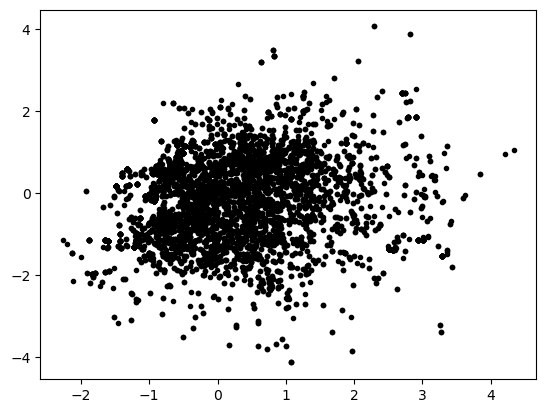

In [12]:
reducer = PCA(n_components=2)
u = reducer.fit_transform(z)

plt.plot(*u.T, 'k.')